In [4]:
import pandas as pd
import configparser
import numpy as np
from datetime import datetime
import dateutil.relativedelta
from matplotlib import pyplot as plt
#%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import os
import pickle


from scipy import stats

# Regular expressions
import re

# seaborn : advanced visualization
import seaborn as sns
print('seaborn version\t:',sns.__version__)

pd.options.mode.chained_assignment = None #set it to None to remove SettingWithCopyWarning
pd.options.display.float_format = '{:.2f}'.format #set it to convert scientific noations such as 4.225108e+11 to 422510842796.00
pd.set_option('display.max_columns', None) # to display all the columns
pd.set_option('display.max_rows', None) # to display all the columns

np.set_printoptions(suppress=True,formatter={'float_kind':'{:f}'.format})


from IPython.core.interactiveshell import InteractiveShell  
InteractiveShell.ast_node_interactivity = "all"

seaborn version	: 0.9.0


## RESTRUCTURED CASESS 90-DPD projections

In [42]:
Restr_df=pd.read_csv('D:\Collections\Adhoc\RESTRUCTURE\MAR21\Restr_Ac_Status_SEP20_MAR21.csv')
Restr_df.shape
add_df=pd.read_csv('D:\Collections\Adhoc\RESTRUCTURE\FEB21\RESTR_AC_JAN21.csv')
add_df.shape

(517564, 19)

(74162, 7)

In [43]:
Restr_df=Restr_df.merge(add_df[['AGMTNO','Month']],on='AGMTNO',how='inner')
Restr_df.shape

(517564, 20)

In [44]:
Restr_df['CUTDATE']=pd.to_datetime(Restr_df['CUTDATE'])
Restr_df['PORTFOLIO_NEW']= Restr_df.PORT+FOLIO.to_list()
Restr_df.loc[~Restr_df.PORTFOLIO.isin(['TW','CA','CD']),'PORTFOLIO_NEW']='OTHERS'
Restr_df.loc[Restr_df.PORTFOLIO.isin(['AP', 'EG', 'RC', 'RV', 'TR', 'LT','LN']),'PORTFOLIO_NEW']='TR_ALL'
Restr_df['PORTFOLIO_NEW'].value_counts(dropna=False)
Restr_df.shape

TW        414663
OTHERS     58611
TR_ALL     24394
CA         19896
Name: PORTFOLIO_NEW, dtype: int64

(517564, 21)

In [ ]:
alloc_df=pd.read_csv('D:\Collections\Adhoc\RESTRUCTURE\FEB21\Restr_Ac_Status_AUG_FEB21_FCE.csv')
alloc_df['CUTDATE']=pd.to_datetime(alloc_df['CUTDATE'])
alloc_df.shape
x_a=pd.merge(Restr_df,alloc_df,on=['AGMTNO','CUTDATE'],how='inner')
x_a.shape

In [1452]:
#x_all=x_a.query("Month=='Sep-20'")
x_all=x_a.copy()
x_all.shape
###################AUG_JAN for TW ########
x_AUG=x_all[(x_all.CUTDATE=='2020-08-31') & (x_all.PORTFOLIO_NEW=='TW') & (x_all.ALLOCATION_TO=='FCE') & (x_all.OPEN_DPD_BKT_GRP==3) ]
x_AUG.shape
x_SEP=x_all[(x_all.CUTDATE=='2020-09-30') & (x_all.PORTFOLIO_NEW=='TW')& (x_all.ALLOCATION_TO=='FCE') & (x_all.OPEN_DPD_BKT_GRP==3)]
x_SEP.shape
x_OCT=x_all[(x_all.CUTDATE=='2020-10-31') & (x_all.PORTFOLIO_NEW=='TW') & (x_all.ALLOCATION_TO=='FCE') & (x_all.OPEN_DPD_BKT_GRP==3)]
x_OCT.shape
x_NOV=x_all[(x_all.CUTDATE=='2020-11-30') & (x_all.PORTFOLIO_NEW=='TW') & (x_all.ALLOCATION_TO=='FCE') & (x_all.OPEN_DPD_BKT_GRP==3)]
x_NOV.shape
x_DEC=x_all[(x_all.CUTDATE=='2020-12-31') & (x_all.PORTFOLIO_NEW=='TW') & (x_all.ALLOCATION_TO=='FCE') & (x_all.OPEN_DPD_BKT_GRP==3)]
x_DEC.shape

x_JAN=x_all[(x_all.CUTDATE=='2021-01-31') & (x_all.PORTFOLIO_NEW=='TW') & (x_all.ALLOCATION_TO=='FCE') & (x_all.OPEN_DPD_BKT_GRP==3)]
x_JAN.shape

# x_FEB=x_all[(x_all.CUTDATE=='2021-02-28') & (x_all.PORTFOLIO_NEW=='TW') & (x_all.ALLOCATION_TO=='FCE') & (x_all.OPEN_DPD_BKT_GRP==3)]
# x_FEB.shape

(518532, 25)

(8230, 25)

(16262, 25)

(12943, 25)

(13655, 25)

(7728, 25)

(7023, 25)

## Sensitivity Analysis of Restructure A/c

In [1454]:
## For DEC
incent_DEC_df= x_DEC.groupby(['ALLOCATION_CODE']).aggregate({'Amount':np.sum,'TOT_COLLECTABLE_AMT':np.sum,'TOT_COLLECTED_AMT':np.sum,'AGMTNO':'count',})
incent_DEC_df.rename(columns={'Amount':'Tot_Incentive','AGMTNO':'No_of_Cases'},inplace=True)
incent_DEC_df['Eff']=100*incent_DEC_df.TOT_COLLECTED_AMT/ incent_DEC_df.TOT_COLLECTABLE_AMT
#incent_DEC_df.head()

In [1]:

def create_inct_step(df):
    incent_mean=df.Tot_Incentive.mean()
    df['incentive_incr']=None
    df.loc[df.Tot_Incentive <100,'incentive_incr']='incentive lt 100'
    df.loc[df.Tot_Incentive.between(100,1000,inclusive=True),'incentive_incr']='incentive bw 100-1000'
    df.loc[df.Tot_Incentive.between(1000,2000,inclusive=True),'incentive_incr']='incentive bw 1000-2000'
    df.loc[df.Tot_Incentive.between(2000,3000,inclusive=True),'incentive_incr']='incentive bw 2000-3000'
    df.loc[df.Tot_Incentive.between(3000,4000,inclusive=True),'incentive_incr']='incentive bw 3000-4000'
    #df.loc[df.Tot_Incentive.between(4000,5000,inclusive=True),'incentive_incr']='incentive bw 4000-5000'
    #df.loc[df.Tot_Incentive.between(5000,6000,inclusive=True),'incentive_incr']='incentive bw 5000-6000'
    #df.loc[df.Tot_Incentive.between(6000,7000,inclusive=True),'incentive_incr']='incentive bw 6000-7000'
    df.loc[df.Tot_Incentive >4000,'incentive_incr']='incentive gt 4000'
    df['Eff_change']=(df.Eff-df.Eff.mean())
    print(df['incentive_incr'].value_counts(dropna=False))
    



In [1471]:
## For AUG
incent_AUG_df= x_AUG.groupby(['ALLOCATION_CODE']).aggregate({'Amount':np.mean,'TOT_COLLECTABLE_AMT':np.sum,'TOT_COLLECTED_AMT':np.sum,'AGMTNO':'count',})
incent_AUG_df.rename(columns={'Amount':'Tot_Incentive','AGMTNO':'No_of_Cases'},inplace=True)
incent_AUG_df['Eff']=100*incent_AUG_df.TOT_COLLECTED_AMT/ incent_AUG_df.TOT_COLLECTABLE_AMT
create_inct_step(incent_AUG_df)    
incent_AUG_df.shape
#incent_AUG_df.head()`

## For SEP
incent_SEP_df= x_SEP.groupby(['ALLOCATION_CODE']).aggregate({'Amount':np.mean,'TOT_COLLECTABLE_AMT':np.sum,'TOT_COLLECTED_AMT':np.sum,'AGMTNO':'count',})
incent_SEP_df.rename(columns={'Amount':'Tot_Incentive','AGMTNO':'No_of_Cases'},inplace=True)
incent_SEP_df['Eff']=100*incent_SEP_df.TOT_COLLECTED_AMT/ incent_SEP_df.TOT_COLLECTABLE_AMT
create_inct_step(incent_SEP_df)    
incent_SEP_df.shape
#incent_SEP_df.head()

## For OCT
incent_OCT_df= x_OCT.groupby(['ALLOCATION_CODE']).aggregate({'Amount':np.mean,'TOT_COLLECTABLE_AMT':np.sum,'TOT_COLLECTED_AMT':np.sum,'AGMTNO':'count',})
incent_OCT_df.rename(columns={'Amount':'Tot_Incentive','AGMTNO':'No_of_Cases'},inplace=True)
incent_OCT_df['Eff']=100*incent_OCT_df.TOT_COLLECTED_AMT/ incent_OCT_df.TOT_COLLECTABLE_AMT
create_inct_step(incent_OCT_df)    
incent_OCT_df.shape
#incent_OCT_df.head()

## For NOV
incent_NOV_df= x_NOV.groupby(['ALLOCATION_CODE']).aggregate({'Amount':np.mean,'TOT_COLLECTABLE_AMT':np.sum,'TOT_COLLECTED_AMT':np.sum,'AGMTNO':'count',})
incent_NOV_df.rename(columns={'Amount':'Tot_Incentive','AGMTNO':'No_of_Cases'},inplace=True)
incent_NOV_df['Eff']=100*incent_NOV_df.TOT_COLLECTED_AMT/ incent_NOV_df.TOT_COLLECTABLE_AMT
create_inct_step(incent_NOV_df)    
incent_NOV_df.shape
#incent_NOV_df.head()

## For DEC
incent_DEC_df= x_DEC.groupby(['ALLOCATION_CODE']).aggregate({'Amount':np.mean,'TOT_COLLECTABLE_AMT':np.sum,'TOT_COLLECTED_AMT':np.sum,'AGMTNO':'count',})
incent_DEC_df.rename(columns={'Amount':'Tot_Incentive','AGMTNO':'No_of_Cases'},inplace=True)
incent_DEC_df['Eff']=100*incent_DEC_df.TOT_COLLECTED_AMT/ incent_DEC_df.TOT_COLLECTABLE_AMT
create_inct_step(incent_DEC_df)    
incent_DEC_df.shape
#incent_DEC_df.head()

incent_final_df=pd.concat([incent_AUG_df,incent_SEP_df,incent_OCT_df,incent_NOV_df,incent_DEC_df],ignore_index=True)
#incent_final_df=pd.concat([incent_AUG_df,incent_SEP_df,incent_DEC_df],ignore_index=True)

incent_final_df.shape
incent_final_df.head()

incentive gt 4000         1402
incentive bw 1000-2000     429
incentive bw 2000-3000     413
incentive bw 3000-4000     378
incentive bw 100-1000      356
incentive lt 100           190
Name: incentive_incr, dtype: int64


(3168, 7)

incentive gt 4000         1265
incentive bw 2000-3000     661
incentive bw 1000-2000     641
incentive lt 100           634
incentive bw 3000-4000     591
incentive bw 100-1000      499
Name: incentive_incr, dtype: int64


(4291, 7)

incentive bw 100-1000     2409
incentive bw 1000-2000     718
incentive lt 100           578
incentive bw 2000-3000     159
incentive bw 3000-4000     150
incentive gt 4000           43
Name: incentive_incr, dtype: int64


(4057, 7)

incentive bw 100-1000     2464
incentive lt 100           509
incentive bw 1000-2000     454
incentive gt 4000          265
incentive bw 2000-3000     246
incentive bw 3000-4000     199
Name: incentive_incr, dtype: int64


(4137, 7)

incentive gt 4000         898
incentive bw 1000-2000    792
incentive bw 100-1000     580
incentive lt 100          411
incentive bw 3000-4000    374
incentive bw 2000-3000    373
Name: incentive_incr, dtype: int64


(3428, 7)

(19081, 7)

,Tot_Incentive,TOT_COLLECTABLE_AMT,TOT_COLLECTED_AMT,No_of_Cases,Eff,incentive_incr,Eff_change
0,12000.00,3624,0.00,1,0.00,incentive gt 4000,-19.73
1,14000.00,6065,1995.00,1,32.89,incentive gt 4000,13.16
2,2450.00,6828,0.00,1,0.00,incentive bw 2000-3000,-19.73
3,0.00,13008,3252.00,1,25.00,incentive lt 100,5.27
4,7850.00,10015,2500.00,1,24.96,incentive gt 4000,5.23


9.61396288371689

<AxesSubplot:ylabel='incentive_incr'>

Text(0.5, 0, 'Increase in Eff (from No_incentive Eff)')

Text(0, 0.5, '')

Text(0.5, 1.0, 'BKT3 EFF INCREASE vs INCENTIVE INCREASE')

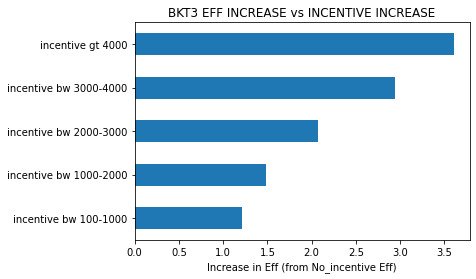

In [1483]:
mean_lt100=incent_final_df.query("incentive_incr=='incentive lt 100'").Eff.mean()
mean_lt100
tmp=(incent_final_df.groupby('incentive_incr').Eff.mean()-mean_lt100)
tmp.drop(index='incentive lt 100',inplace=True)
#tmp=100*tmp/mean_lt100
tmp.plot(kind='barh')
plt.xlabel("Increase in Eff (from No_incentive Eff)")
plt.ylabel("")
plt.title("BKT3 EFF INCREASE vs INCENTIVE INCREASE")

<AxesSubplot:xlabel='incentive_incr'>

Text(0.5, 0, '')

Text(0, 0.5, 'Increase in Eff (from No_incentive Eff)')

(array([-0.500000, 0.000000, 0.500000, 1.000000, 1.500000, 2.000000,
        2.500000, 3.000000, 3.500000, 4.000000, 4.500000]),
 [Text(-0.5, 0, ''),
  Text(0.0, 0, 'incentive bw 100-1000'),
  Text(0.5, 0, ''),
  Text(1.0, 0, 'incentive bw 1000-2000'),
  Text(1.5, 0, ''),
  Text(2.0, 0, 'incentive bw 2000-3000'),
  Text(2.5, 0, ''),
  Text(3.0, 0, 'incentive bw 3000-4000'),
  Text(3.5, 0, ''),
  Text(4.0, 0, 'incentive gt 4000'),
  Text(4.5, 0, '')])

Text(0.5, 1.0, 'BKT3 EFF INCREASE vs INCENTIVE INCREASE')

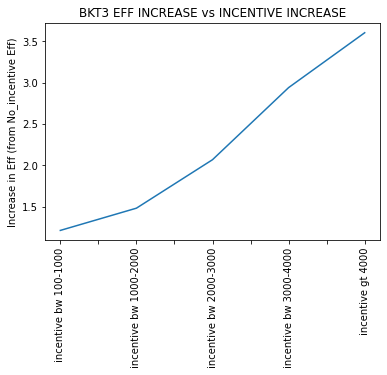

In [1484]:
tmp.plot()
plt.xlabel("")
plt.ylabel("Increase in Eff (from No_incentive Eff)")
plt.xticks(rotation = 90)
plt.title("BKT3 EFF INCREASE vs INCENTIVE INCREASE")

In [1485]:
tmp

incentive_incr
incentive bw 100-1000    1.21
incentive bw 1000-2000   1.48
incentive bw 2000-3000   2.07
incentive bw 3000-4000   2.94
incentive gt 4000        3.60
Name: Eff, dtype: float64

<AxesSubplot:xlabel='incentive_incr', ylabel='Eff_change'>

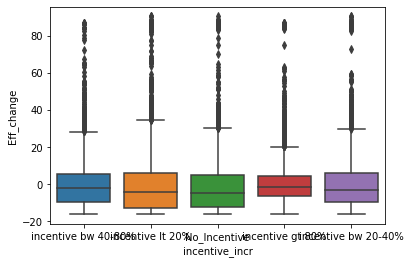

In [1340]:
sns.boxplot(x=incent_final_df.incentive_incr,y=incent_final_df.Eff_change)

## Sensitivity Analysis for NO_MORAT

In [ ]:
incent_df=pd.read_excel('D:\Collections\Adhoc\RESTRUCTURE\FEB21\FCE_INCENTIVE.xlsx',sheet_name='Sheet1')
incent_df.rename(columns={'Emp Id':'ALLOCATION_CODE'},inplace=True)
incent_df_copy=incent_df.copy()
incent_df_copy.shape
incent_df_copy.columns




In [9]:
incent_df=incent_df_copy.copy()
incent_df['ALLOCATION_CODE']=incent_df.ALLOCATION_CODE.astype('str')
incent_df['Month of']=pd.to_datetime(incent_df['Month of'],errors='coerce')
incent_df['Month of'].fillna(incent_df['Month of'].value_counts().index[0],inplace=True)
incent_df['MONTH']=incent_df['Month of'].dt.to_period('M')
incent_df.shape
incent_df=incent_df[incent_df.Product=='Two Wheeler']
incent_df.shape

(240239, 15)

(175761, 15)

In [21]:
x_OCT=x_OCT[(x_OCT.OPEN_DPD_BKT_GRP==3) & (x_OCT.ALLOCATION_TO=='FCE') & (x_OCT.MORAT_FLAG=='NO_MORAT')]
x_OCT.MORAT_FLAG.value_counts()
x_OCT.Amount.describe()

NO_MORAT    48460
Name: MORAT_FLAG, dtype: int64

count   48460.00
mean      831.37
std      1161.81
min         0.00
25%       100.00
50%       600.00
75%      1100.00
max     33597.72
Name: Amount, dtype: float64

In [105]:
##  For OCT
x_OCT=pd.read_csv(r'D:\Collections\Adhoc\TW\Data\TW_OCT.csv')
x_OCT=x_OCT[(x_OCT.OPEN_DPD_BKT_GRP==3) & (x_OCT.ALLOCATION_TO=='FCE') & (x_OCT.MORAT_FLAG=='NO_MORAT')]
x_OCT['CUTDATE'] = pd.to_datetime(x_OCT.CUTDATE)
x_OCT['MONTH']=x_OCT.CUTDATE.dt.to_period('M')
x_OCT['ALLOCATION_CODE'] =x_OCT.ALLOCATION_CODE.str.strip()
x_OCT.shape
x_OCT=x_OCT.merge(incent_df[['ALLOCATION_CODE','Amount','MONTH']],on=['ALLOCATION_CODE','MONTH'],how='left')
x_OCT.shape
x_OCT=x_OCT[~x_OCT.duplicated(subset=['AGMTNO','CUTDATE'])]
x_OCT.Amount.fillna(0,inplace=True)
x_OCT.shape

## For NOV
x_NOV=pd.read_csv(r'D:\Collections\Adhoc\TW\Data\TW_NOV.csv')
x_NOV=x_NOV[(x_NOV.OPEN_DPD_BKT_GRP==3) & (x_NOV.ALLOCATION_TO=='FCE') & (x_NOV.MORAT_FLAG=='NO_MORAT')]
x_NOV['CUTDATE'] = pd.to_datetime(x_NOV.CUTDATE)
x_NOV['MONTH']=x_NOV.CUTDATE.dt.to_period('M')
x_NOV['ALLOCATION_CODE'] =x_NOV.ALLOCATION_CODE.str.strip()
x_NOV.shape
x_NOV=x_NOV.merge(incent_df[['ALLOCATION_CODE','Amount','MONTH']],on=['ALLOCATION_CODE','MONTH'],how='left')
x_NOV.shape
x_NOV=x_NOV[~x_NOV.duplicated(subset=['AGMTNO','CUTDATE'])]
x_NOV.Amount.fillna(0,inplace=True)
x_NOV.shape

## For DEC
x_DEC=pd.read_csv(r'D:\Collections\Adhoc\TW\Data\TW_DEC.csv')
x_DEC=x_DEC[(x_DEC.OPEN_DPD_BKT_GRP==3) & (x_DEC.ALLOCATION_TO=='FCE') & (x_DEC.MORAT_FLAG=='NO_MORAT')]
x_DEC['CUTDATE'] = pd.to_datetime(x_DEC.CUTDATE)
x_DEC['MONTH']=x_DEC.CUTDATE.dt.to_period('M')
x_DEC['ALLOCATION_CODE'] =x_DEC.ALLOCATION_CODE.str.strip()
x_DEC.shape
x_DEC=x_DEC.merge(incent_df[['ALLOCATION_CODE','Amount','MONTH']],on=['ALLOCATION_CODE','MONTH'],how='left')
x_DEC.shape
x_DEC=x_DEC[~x_DEC.duplicated(subset=['AGMTNO','CUTDATE'])]
x_DEC.Amount.fillna(0,inplace=True)
x_DEC.shape


(48460, 160)

(236141, 161)

(48460, 161)

(57150, 159)

(181291, 160)

(57150, 160)

(52687, 159)

(164600, 160)

(52687, 160)

In [106]:
def create_inct_step(df):
    incent_mean=df.Tot_Incentive.mean()
    df['incentive_incr']=None
    df.loc[df.Tot_Incentive <100,'incentive_incr']='incentive lt 100'
    df.loc[df.Tot_Incentive.between(100,1000,inclusive=True),'incentive_incr']='incentive bw 100-1000'
    df.loc[df.Tot_Incentive.between(1000,2000,inclusive=True),'incentive_incr']='incentive bw 1000-2000'
    df.loc[df.Tot_Incentive.between(2000,3000,inclusive=True),'incentive_incr']='incentive bw 2000-3000'
    df.loc[df.Tot_Incentive.between(3000,4000,inclusive=True),'incentive_incr']='incentive bw 3000-4000'
    #df.loc[df.Tot_Incentive.between(4000,5000,inclusive=True),'incentive_incr']='incentive bw 4000-5000'
    #df.loc[df.Tot_Incentive.between(5000,6000,inclusive=True),'incentive_incr']='incentive bw 5000-6000'
    #df.loc[df.Tot_Incentive.between(6000,7000,inclusive=True),'incentive_incr']='incentive bw 6000-7000'
    df.loc[df.Tot_Incentive >4000,'incentive_incr']='incentive gt 4000'
    df['Eff_change']=(df.Eff-df.Eff.mean())
    print(df['incentive_incr'].value_counts(dropna=False))

In [108]:
## For OCT
incent_OCT_NM_df= x_OCT.groupby(['ALLOCATION_CODE']).aggregate({'Amount':np.mean,'TOT_COLLECTABLE_AMT':np.sum,'TOT_COLLECTED_AMT':np.sum,'AGMTNO':'count',})
incent_OCT_NM_df.rename(columns={'Amount':'Tot_Incentive','AGMTNO':'No_of_Cases'},inplace=True)
incent_OCT_NM_df['Eff']=100*incent_OCT_NM_df.TOT_COLLECTED_AMT/ incent_OCT_NM_df.TOT_COLLECTABLE_AMT
create_inct_step(incent_OCT_NM_df)    
incent_OCT_NM_df.shape
#incent_OCT_NM_df.head()

## For NOV
incent_NOV_NM_df= x_NOV.groupby(['ALLOCATION_CODE']).aggregate({'Amount':np.mean,'TOT_COLLECTABLE_AMT':np.sum,'TOT_COLLECTED_AMT':np.sum,'AGMTNO':'count',})
incent_NOV_NM_df.rename(columns={'Amount':'Tot_Incentive','AGMTNO':'No_of_Cases'},inplace=True)
incent_NOV_NM_df['Eff']=100*incent_NOV_NM_df.TOT_COLLECTED_AMT/ incent_NOV_NM_df.TOT_COLLECTABLE_AMT
create_inct_step(incent_NOV_NM_df)    
incent_NOV_NM_df.shape

## For DEC
incent_DEC_NM_df= x_DEC.groupby(['ALLOCATION_CODE']).aggregate({'Amount':np.mean,'TOT_COLLECTABLE_AMT':np.sum,'TOT_COLLECTED_AMT':np.sum,'AGMTNO':'count',})
incent_DEC_NM_df.rename(columns={'Amount':'Tot_Incentive','AGMTNO':'No_of_Cases'},inplace=True)
incent_DEC_NM_df['Eff']=100*incent_DEC_NM_df.TOT_COLLECTED_AMT/ incent_DEC_NM_df.TOT_COLLECTABLE_AMT
create_inct_step(incent_DEC_NM_df)    
incent_DEC_NM_df.shape
#incent_DEC_NM_df.head()

incent_final_NM_df=pd.concat([incent_OCT_NM_df,incent_NOV_NM_df,incent_DEC_NM_df],ignore_index=True)
#incent_final_NM_df=pd.concat([incent_DEC_NM_df],ignore_index=True)
incent_final_NM_df.shape

incentive bw 100-1000     3091
incentive lt 100          2146
incentive bw 1000-2000     801
incentive bw 2000-3000     222
incentive bw 3000-4000     190
incentive gt 4000           83
Name: incentive_incr, dtype: int64


(6533, 7)

incentive bw 100-1000     2932
incentive lt 100           958
incentive bw 1000-2000     569
incentive gt 4000          359
incentive bw 2000-3000     315
incentive bw 3000-4000     253
Name: incentive_incr, dtype: int64


(5386, 7)

incentive gt 4000         1330
incentive bw 1000-2000    1197
incentive bw 100-1000      884
incentive lt 100           620
incentive bw 2000-3000     607
incentive bw 3000-4000     548
Name: incentive_incr, dtype: int64


(5186, 7)

(17105, 7)

31.30693757138651

Tot_Incentive          3724
TOT_COLLECTABLE_AMT    3724
TOT_COLLECTED_AMT      3724
No_of_Cases            3724
Eff                    3724
incentive_incr         3724
Eff_change             3724
dtype: int64

<AxesSubplot:ylabel='incentive_incr'>

Text(0.5, 0, 'Increase in Eff (from No_incentive Eff)')

Text(0, 0.5, '')

Text(0.5, 1.0, 'BKT3 EFF INCREASE vs INCENTIVE INCREASE- NO_MORAT')

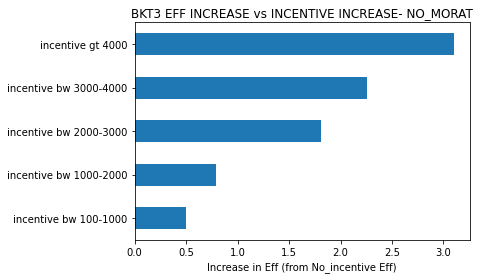

In [109]:
mean_lt100=incent_final_NM_df.query("incentive_incr=='incentive lt 100'").Eff.mean()
mean_lt100
incent_final_NM_df.query("incentive_incr=='incentive lt 100'").count()
tmp=(incent_final_NM_df.groupby('incentive_incr').Eff.mean()-mean_lt100)
tmp.drop(index='incentive lt 100',inplace=True)
#tmp=100*tmp/mean_lt100
tmp.plot(kind='barh')
plt.xlabel("Increase in Eff (from No_incentive Eff)")
plt.ylabel("")
plt.title("BKT3 EFF INCREASE vs INCENTIVE INCREASE- NO_MORAT")

<AxesSubplot:xlabel='incentive_incr'>

Text(0.5, 0, '')

Text(0, 0.5, 'Increase in Eff (from No_incentive Eff)')

(array([-0.500000, 0.000000, 0.500000, 1.000000, 1.500000, 2.000000,
        2.500000, 3.000000, 3.500000, 4.000000, 4.500000]),
 [Text(-0.5, 0, ''),
  Text(0.0, 0, 'incentive bw 100-1000'),
  Text(0.5, 0, ''),
  Text(1.0, 0, 'incentive bw 1000-2000'),
  Text(1.5, 0, ''),
  Text(2.0, 0, 'incentive bw 2000-3000'),
  Text(2.5, 0, ''),
  Text(3.0, 0, 'incentive bw 3000-4000'),
  Text(3.5, 0, ''),
  Text(4.0, 0, 'incentive gt 4000'),
  Text(4.5, 0, '')])

Text(0.5, 1.0, 'BKT3 EFF INCREASE vs INCENTIVE INCREASE')

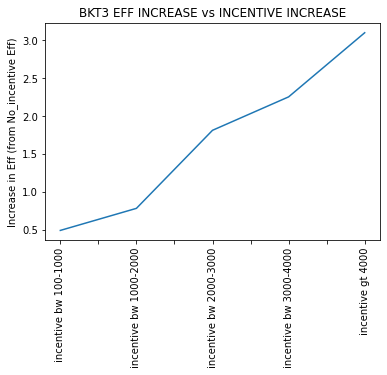

In [110]:
tmp.plot()
plt.xlabel("")
plt.ylabel("Increase in Eff (from No_incentive Eff)")
plt.xticks(rotation = 90)
plt.title("BKT3 EFF INCREASE vs INCENTIVE INCREASE")

In [112]:
tmp

incentive_incr
incentive bw 100-1000    0.50
incentive bw 1000-2000   0.79
incentive bw 2000-3000   1.81
incentive bw 3000-4000   2.25
incentive gt 4000        3.10
Name: Eff, dtype: float64

In [111]:
incent_final_NM_df.groupby('incentive_incr').Tot_Incentive.count()

incentive_incr
incentive bw 100-1000     6907
incentive bw 1000-2000    2567
incentive bw 2000-3000    1144
incentive bw 3000-4000     991
incentive gt 4000         1772
incentive lt 100          3724
Name: Tot_Incentive, dtype: int64

## Sensitivity Analysis for GEN_MORAT

In [113]:
##  For OCT
x_OCT=pd.read_csv(r'D:\Collections\Adhoc\TW\Data\TW_OCT.csv')
x_OCT=x_OCT[(x_OCT.OPEN_DPD_BKT_GRP==3) & (x_OCT.ALLOCATION_TO=='FCE') & (x_OCT.MORAT_FLAG=='Gen_Morat')]
x_OCT['CUTDATE'] = pd.to_datetime(x_OCT.CUTDATE)
x_OCT['MONTH']=x_OCT.CUTDATE.dt.to_period('M')
x_OCT['ALLOCATION_CODE'] =x_OCT.ALLOCATION_CODE.str.strip()
x_OCT.shape
x_OCT=x_OCT.merge(incent_df[['ALLOCATION_CODE','Amount','MONTH']],on=['ALLOCATION_CODE','MONTH'],how='left')
x_OCT.shape
x_OCT=x_OCT[~x_OCT.duplicated(subset=['AGMTNO','CUTDATE'])]
x_OCT.Amount.fillna(0,inplace=True)
x_OCT.shape

## For NOV
x_NOV=pd.read_csv(r'D:\Collections\Adhoc\TW\Data\TW_NOV.csv')
x_NOV=x_NOV[(x_NOV.OPEN_DPD_BKT_GRP==3) & (x_NOV.ALLOCATION_TO=='FCE') & (x_NOV.MORAT_FLAG=='Gen_Morat')]
x_NOV['CUTDATE'] = pd.to_datetime(x_NOV.CUTDATE)
x_NOV['MONTH']=x_NOV.CUTDATE.dt.to_period('M')
x_NOV.shape
x_NOV=x_NOV.merge(incent_df[['ALLOCATION_CODE','Amount','MONTH']],on=['ALLOCATION_CODE','MONTH'],how='left')
x_NOV['ALLOCATION_CODE'] =x_NOV.ALLOCATION_CODE.str.strip()
x_NOV.shape
x_NOV=x_NOV[~x_NOV.duplicated(subset=['AGMTNO','CUTDATE'])]
x_NOV.Amount.fillna(0,inplace=True)
x_NOV.shape

## For DEC
x_DEC=pd.read_csv(r'D:\Collections\Adhoc\TW\Data\TW_DEC.csv')
x_DEC=x_DEC[(x_DEC.OPEN_DPD_BKT_GRP==3) & (x_DEC.ALLOCATION_TO=='FCE') & (x_DEC.MORAT_FLAG=='Gen_Morat')]
x_DEC['CUTDATE'] = pd.to_datetime(x_DEC.CUTDATE)
x_DEC['MONTH']=x_DEC.CUTDATE.dt.to_period('M')
x_DEC['ALLOCATION_CODE'] =x_DEC.ALLOCATION_CODE.str.strip()
x_DEC.shape
x_DEC=x_DEC.merge(incent_df[['ALLOCATION_CODE','Amount','MONTH']],on=['ALLOCATION_CODE','MONTH'],how='left')
x_DEC.shape
x_DEC=x_DEC[~x_DEC.duplicated(subset=['AGMTNO','CUTDATE'])]
x_DEC.Amount.fillna(0,inplace=True)
x_DEC.shape


(16555, 160)

(80688, 161)

(16555, 161)

(20020, 159)

(62238, 160)

(20020, 160)

(20235, 159)

(66848, 160)

(20235, 160)

In [114]:
def create_inct_step(df):
    incent_mean=df.Tot_Incentive.mean()
    df['incentive_incr']=None
    df.loc[df.Tot_Incentive <100,'incentive_incr']='incentive lt 100'
    df.loc[df.Tot_Incentive.between(100,1000,inclusive=True),'incentive_incr']='incentive bw 100-1000'
    df.loc[df.Tot_Incentive.between(1000,2000,inclusive=True),'incentive_incr']='incentive bw 1000-2000'
    df.loc[df.Tot_Incentive.between(2000,3000,inclusive=True),'incentive_incr']='incentive bw 2000-3000'
    df.loc[df.Tot_Incentive.between(3000,4000,inclusive=True),'incentive_incr']='incentive bw 3000-4000'
    #df.loc[df.Tot_Incentive.between(4000,5000,inclusive=True),'incentive_incr']='incentive bw 4000-5000'
    #df.loc[df.Tot_Incentive.between(5000,6000,inclusive=True),'incentive_incr']='incentive bw 5000-6000'
    #df.loc[df.Tot_Incentive.between(6000,7000,inclusive=True),'incentive_incr']='incentive bw 6000-7000'
    df.loc[df.Tot_Incentive >4000,'incentive_incr']='incentive gt 4000'
    df['Eff_change']=(df.Eff-df.Eff.mean())
    print(df['incentive_incr'].value_counts(dropna=False))

In [115]:
## For OCT
incent_OCT_GM_df= x_OCT.groupby(['ALLOCATION_CODE']).aggregate({'Amount':np.mean,'TOT_COLLECTABLE_AMT':np.sum,'TOT_COLLECTED_AMT':np.sum,'AGMTNO':'count',})
incent_OCT_GM_df.rename(columns={'Amount':'Tot_Incentive','AGMTNO':'No_of_Cases'},inplace=True)
incent_OCT_GM_df['Eff']=100*incent_OCT_GM_df.TOT_COLLECTED_AMT/ incent_OCT_GM_df.TOT_COLLECTABLE_AMT
create_inct_step(incent_OCT_GM_df)    
incent_OCT_GM_df.shape
#incent_OCT_GM_df.head()

## For NOV
incent_NOV_GM_df= x_NOV.groupby(['ALLOCATION_CODE']).aggregate({'Amount':np.mean,'TOT_COLLECTABLE_AMT':np.sum,'TOT_COLLECTED_AMT':np.sum,'AGMTNO':'count',})
incent_NOV_GM_df.rename(columns={'Amount':'Tot_Incentive','AGMTNO':'No_of_Cases'},inplace=True)
incent_NOV_GM_df['Eff']=100*incent_NOV_GM_df.TOT_COLLECTED_AMT/ incent_NOV_GM_df.TOT_COLLECTABLE_AMT
create_inct_step(incent_NOV_GM_df)    
incent_NOV_GM_df.shape

## For DEC
incent_DEC_GM_df= x_DEC.groupby(['ALLOCATION_CODE']).aggregate({'Amount':np.mean,'TOT_COLLECTABLE_AMT':np.sum,'TOT_COLLECTED_AMT':np.sum,'AGMTNO':'count',})
incent_DEC_GM_df.rename(columns={'Amount':'Tot_Incentive','AGMTNO':'No_of_Cases'},inplace=True)
incent_DEC_GM_df['Eff']=100*incent_DEC_GM_df.TOT_COLLECTED_AMT/ incent_DEC_GM_df.TOT_COLLECTABLE_AMT
create_inct_step(incent_DEC_GM_df)    
incent_DEC_GM_df.shape
#incent_DEC_GM_df.head()

incent_final_GM_df=pd.concat([incent_OCT_GM_df,incent_NOV_GM_df,incent_DEC_GM_df],ignore_index=True)
#incent_final_GM_df=pd.concat([incent_DEC_GM_df],ignore_index=True)
incent_final_GM_df.shape

incentive bw 100-1000     2565
incentive lt 100           958
incentive bw 1000-2000     726
incentive bw 2000-3000     185
incentive bw 3000-4000     156
incentive gt 4000           50
Name: incentive_incr, dtype: int64


(4640, 7)

incentive bw 100-1000     2345
incentive lt 100           643
incentive bw 1000-2000     491
incentive gt 4000          289
incentive bw 2000-3000     261
incentive bw 3000-4000     209
Name: incentive_incr, dtype: int64


(4238, 7)

incentive gt 4000         1217
incentive bw 1000-2000    1077
incentive bw 100-1000      805
incentive bw 2000-3000     549
incentive lt 100           541
incentive bw 3000-4000     485
Name: incentive_incr, dtype: int64


(4674, 7)

(13552, 7)

26.554996106993627

<AxesSubplot:ylabel='incentive_incr'>

Text(0.5, 0, 'Increase in Eff (from No_incentive Eff)')

Text(0, 0.5, '')

Text(0.5, 1.0, 'BKT3 EFF INCREASE vs INCENTIVE INCREASE- GEN MORAT')

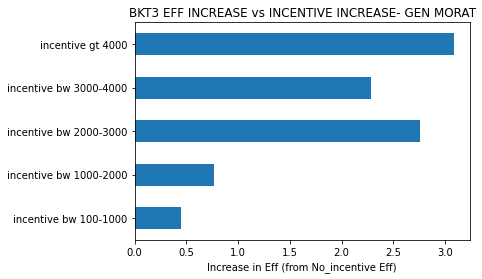

In [116]:
mean_lt100=incent_final_GM_df.query("incentive_incr=='incentive lt 100'").Eff.mean()
mean_lt100
tmp=(incent_final_GM_df.groupby('incentive_incr').Eff.mean()-mean_lt100)
tmp.drop(index='incentive lt 100',inplace=True)
#tmp=100*tmp/mean_lt100
tmp.plot(kind='barh')
plt.xlabel("Increase in Eff (from No_incentive Eff)")
plt.ylabel("")
plt.title("BKT3 EFF INCREASE vs INCENTIVE INCREASE- GEN MORAT")

<AxesSubplot:xlabel='incentive_incr'>

Text(0.5, 0, '')

Text(0, 0.5, 'Increase in Eff (from No_incentive Eff)')

(array([-0.500000, 0.000000, 0.500000, 1.000000, 1.500000, 2.000000,
        2.500000, 3.000000, 3.500000, 4.000000, 4.500000]),
 [Text(-0.5, 0, ''),
  Text(0.0, 0, 'incentive bw 100-1000'),
  Text(0.5, 0, ''),
  Text(1.0, 0, 'incentive bw 1000-2000'),
  Text(1.5, 0, ''),
  Text(2.0, 0, 'incentive bw 2000-3000'),
  Text(2.5, 0, ''),
  Text(3.0, 0, 'incentive bw 3000-4000'),
  Text(3.5, 0, ''),
  Text(4.0, 0, 'incentive gt 4000'),
  Text(4.5, 0, '')])

Text(0.5, 1.0, 'BKT3 EFF INCREASE vs INCENTIVE INCREASE')

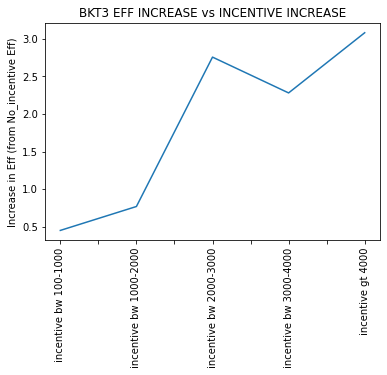

In [117]:
tmp.plot()
plt.xlabel("")
plt.ylabel("Increase in Eff (from No_incentive Eff)")
plt.xticks(rotation = 90)
plt.title("BKT3 EFF INCREASE vs INCENTIVE INCREASE")

In [118]:
tmp

incentive_incr
incentive bw 100-1000    0.45
incentive bw 1000-2000   0.77
incentive bw 2000-3000   2.76
incentive bw 3000-4000   2.28
incentive gt 4000        3.08
Name: Eff, dtype: float64

In [119]:
incent_final_GM_df.groupby('incentive_incr').Tot_Incentive.count()

incentive_incr
incentive bw 100-1000     5715
incentive bw 1000-2000    2294
incentive bw 2000-3000     995
incentive bw 3000-4000     850
incentive gt 4000         1556
incentive lt 100          2142
Name: Tot_Incentive, dtype: int64

## Sensitivity Analysis for SUO_MORAT

In [120]:
##  For OCT
x_OCT=pd.read_csv(r'D:\Collections\Adhoc\TW\Data\TW_OCT.csv')
x_OCT=x_OCT[(x_OCT.OPEN_DPD_BKT_GRP==3) & (x_OCT.ALLOCATION_TO=='FCE') & (x_OCT.MORAT_FLAG=='SuoMoto')]
x_OCT['CUTDATE'] = pd.to_datetime(x_OCT.CUTDATE)
x_OCT['MONTH']=x_OCT.CUTDATE.dt.to_period('M')
x_OCT['ALLOCATION_CODE'] =x_OCT.ALLOCATION_CODE.str.strip()
x_OCT.shape
x_OCT=x_OCT.merge(incent_df[['ALLOCATION_CODE','Amount','MONTH']],on=['ALLOCATION_CODE','MONTH'],how='left')
x_OCT.shape
x_OCT=x_OCT[~x_OCT.duplicated(subset=['AGMTNO','CUTDATE'])]
x_OCT.Amount.fillna(0,inplace=True)
x_OCT.shape

## For NOV
x_NOV=pd.read_csv(r'D:\Collections\Adhoc\TW\Data\TW_NOV.csv')
x_NOV=x_NOV[(x_NOV.OPEN_DPD_BKT_GRP==3) & (x_NOV.ALLOCATION_TO=='FCE') & (x_NOV.MORAT_FLAG=='SuoMoto')]
x_NOV['CUTDATE'] = pd.to_datetime(x_NOV.CUTDATE)
x_NOV['MONTH']=x_NOV.CUTDATE.dt.to_period('M')
x_NOV['ALLOCATION_CODE'] =x_NOV.ALLOCATION_CODE.str.strip()
x_NOV.shape
x_NOV=x_NOV.merge(incent_df[['ALLOCATION_CODE','Amount','MONTH']],on=['ALLOCATION_CODE','MONTH'],how='left')
x_NOV.shape
x_NOV=x_NOV[~x_NOV.duplicated(subset=['AGMTNO','CUTDATE'])]
x_NOV.Amount.fillna(0,inplace=True)
x_NOV.shape

## For DEC
x_DEC=pd.read_csv(r'D:\Collections\Adhoc\TW\Data\TW_DEC.csv')
x_DEC=x_DEC[(x_DEC.OPEN_DPD_BKT_GRP==3) & (x_DEC.ALLOCATION_TO=='FCE') & (x_DEC.MORAT_FLAG=='SuoMoto')]
x_DEC['CUTDATE'] = pd.to_datetime(x_DEC.CUTDATE)
x_DEC['MONTH']=x_DEC.CUTDATE.dt.to_period('M')
x_DEC['ALLOCATION_CODE'] =x_DEC.ALLOCATION_CODE.str.strip()
x_DEC.shape
x_DEC=x_DEC.merge(incent_df[['ALLOCATION_CODE','Amount','MONTH']],on=['ALLOCATION_CODE','MONTH'],how='left')
x_DEC.shape
x_DEC=x_DEC[~x_DEC.duplicated(subset=['AGMTNO','CUTDATE'])]
x_DEC.Amount.fillna(0,inplace=True)
x_DEC.shape


(29031, 160)

(141368, 161)

(29031, 161)

(40718, 159)

(124242, 160)

(40718, 160)

(38740, 159)

(125488, 160)

(38740, 160)

In [121]:
def create_inct_step(df):
    incent_mean=df.Tot_Incentive.mean()
    df['incentive_incr']=None
    df.loc[df.Tot_Incentive <100,'incentive_incr']='incentive lt 100'
    df.loc[df.Tot_Incentive.between(100,1000,inclusive=True),'incentive_incr']='incentive bw 100-1000'
    df.loc[df.Tot_Incentive.between(1000,2000,inclusive=True),'incentive_incr']='incentive bw 1000-2000'
    df.loc[df.Tot_Incentive.between(2000,3000,inclusive=True),'incentive_incr']='incentive bw 2000-3000'
    df.loc[df.Tot_Incentive.between(3000,4000,inclusive=True),'incentive_incr']='incentive bw 3000-4000'
    #df.loc[df.Tot_Incentive.between(4000,5000,inclusive=True),'incentive_incr']='incentive bw 4000-5000'
    #df.loc[df.Tot_Incentive.between(5000,6000,inclusive=True),'incentive_incr']='incentive bw 5000-6000'
    #df.loc[df.Tot_Incentive.between(6000,7000,inclusive=True),'incentive_incr']='incentive bw 6000-7000'
    df.loc[df.Tot_Incentive >4000,'incentive_incr']='incentive gt 4000'
    df['Eff_change']=(df.Eff-df.Eff.mean())
    print(df['incentive_incr'].value_counts(dropna=False))

In [122]:
## For OCT
incent_OCT_SM_df= x_OCT.groupby(['ALLOCATION_CODE']).aggregate({'Amount':np.mean,'TOT_COLLECTABLE_AMT':np.sum,'TOT_COLLECTED_AMT':np.sum,'AGMTNO':'count',})
incent_OCT_SM_df.rename(columns={'Amount':'Tot_Incentive','AGMTNO':'No_of_Cases'},inplace=True)
incent_OCT_SM_df['Eff']=100*incent_OCT_SM_df.TOT_COLLECTED_AMT/ incent_OCT_SM_df.TOT_COLLECTABLE_AMT
create_inct_step(incent_OCT_SM_df)    
incent_OCT_SM_df.shape
#incent_OCT_SM_df.head()

## For NOV
incent_NOV_SM_df= x_NOV.groupby(['ALLOCATION_CODE']).aggregate({'Amount':np.mean,'TOT_COLLECTABLE_AMT':np.sum,'TOT_COLLECTED_AMT':np.sum,'AGMTNO':'count',})
incent_NOV_SM_df.rename(columns={'Amount':'Tot_Incentive','AGMTNO':'No_of_Cases'},inplace=True)
incent_NOV_SM_df['Eff']=100*incent_NOV_SM_df.TOT_COLLECTED_AMT/ incent_NOV_SM_df.TOT_COLLECTABLE_AMT
create_inct_step(incent_NOV_SM_df)    
incent_NOV_SM_df.shape

## For DEC
incent_DEC_SM_df= x_DEC.groupby(['ALLOCATION_CODE']).aggregate({'Amount':np.mean,'TOT_COLLECTABLE_AMT':np.sum,'TOT_COLLECTED_AMT':np.sum,'AGMTNO':'count',})
incent_DEC_SM_df.rename(columns={'Amount':'Tot_Incentive','AGMTNO':'No_of_Cases'},inplace=True)
incent_DEC_SM_df['Eff']=100*incent_DEC_SM_df.TOT_COLLECTED_AMT/ incent_DEC_SM_df.TOT_COLLECTABLE_AMT
create_inct_step(incent_DEC_SM_df)    
incent_DEC_SM_df.shape
#incent_DEC_SM_df.head()

incent_final_SM_df=pd.concat([incent_OCT_SM_df,incent_NOV_SM_df,incent_DEC_SM_df],ignore_index=True)
#incent_final_SM_df=pd.concat([incent_DEC_SM_df],ignore_index=True)
incent_final_SM_df.shape

incentive bw 100-1000     2911
incentive lt 100          1235
incentive bw 1000-2000     773
incentive bw 2000-3000     207
incentive bw 3000-4000     181
incentive gt 4000           56
Name: incentive_incr, dtype: int64


(5363, 7)

incentive bw 100-1000     2742
incentive lt 100           886
incentive bw 1000-2000     532
incentive gt 4000          339
incentive bw 2000-3000     287
incentive bw 3000-4000     240
Name: incentive_incr, dtype: int64


(5026, 7)

incentive gt 4000         1280
incentive bw 1000-2000    1184
incentive bw 100-1000      852
incentive lt 100           599
incentive bw 2000-3000     583
incentive bw 3000-4000     532
Name: incentive_incr, dtype: int64


(5030, 7)

(15419, 7)

21.344967517241056

<AxesSubplot:ylabel='incentive_incr'>

Text(0.5, 0, 'Increase in Eff (from No_incentive Eff)')

Text(0, 0.5, '')

Text(0.5, 1.0, 'BKT3 EFF INCREASE vs INCENTIVE INCREASE: SUO MORAT')

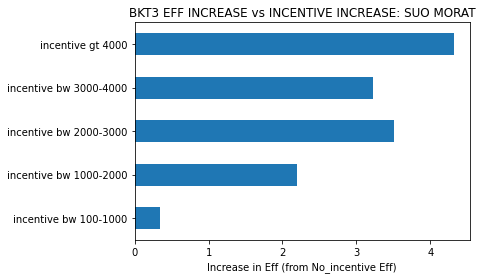

In [123]:
mean_lt100=incent_final_SM_df.query("incentive_incr=='incentive lt 100'").Eff.mean()
mean_lt100
tmp=(incent_final_SM_df.groupby('incentive_incr').Eff.mean()-mean_lt100)
tmp.drop(index='incentive lt 100',inplace=True)
#tmp=100*tmp/mean_lt100
tmp.plot(kind='barh')
plt.xlabel("Increase in Eff (from No_incentive Eff)")
plt.ylabel("")
plt.title("BKT3 EFF INCREASE vs INCENTIVE INCREASE: SUO MORAT")

<AxesSubplot:xlabel='incentive_incr'>

Text(0.5, 0, '')

Text(0, 0.5, 'Increase in Eff (from No_incentive Eff)')

(array([-0.500000, 0.000000, 0.500000, 1.000000, 1.500000, 2.000000,
        2.500000, 3.000000, 3.500000, 4.000000, 4.500000]),
 [Text(-0.5, 0, ''),
  Text(0.0, 0, 'incentive bw 100-1000'),
  Text(0.5, 0, ''),
  Text(1.0, 0, 'incentive bw 1000-2000'),
  Text(1.5, 0, ''),
  Text(2.0, 0, 'incentive bw 2000-3000'),
  Text(2.5, 0, ''),
  Text(3.0, 0, 'incentive bw 3000-4000'),
  Text(3.5, 0, ''),
  Text(4.0, 0, 'incentive gt 4000'),
  Text(4.5, 0, '')])

Text(0.5, 1.0, 'BKT3 EFF INCREASE vs INCENTIVE INCREASE')

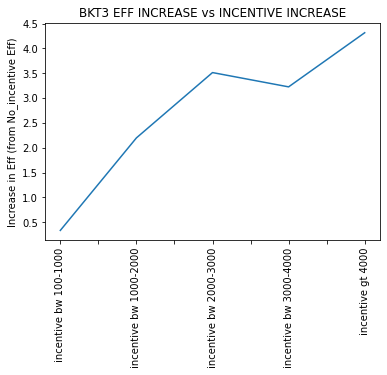

In [124]:
tmp.plot()
plt.xlabel("")
plt.ylabel("Increase in Eff (from No_incentive Eff)")
plt.xticks(rotation = 90)
plt.title("BKT3 EFF INCREASE vs INCENTIVE INCREASE")

In [125]:
tmp

incentive_incr
incentive bw 100-1000    0.34
incentive bw 1000-2000   2.20
incentive bw 2000-3000   3.51
incentive bw 3000-4000   3.23
incentive gt 4000        4.32
Name: Eff, dtype: float64